# plotting graph for deaths global data

In [1]:
#importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#importing the dataset

df=pd.read_csv('C:\\Users\\aravind\\Desktop\\VUMONIC DATALABS\\time_series_covid19_deaths_global.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [5]:
deaths_df=df

In [6]:
cols = deaths_df.keys()

In [7]:
deaths= deaths_df.loc[:, cols[4]:cols[-1]]

In [8]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,0,0,0,0,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,0,0,0,0,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,0,0,0,0,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [9]:
dates= deaths.keys()

In [10]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=174)

In [11]:
world_cases = []

In [12]:
for i in dates:
    deaths_sum = deaths[i].sum()
    
    world_cases.append(deaths_sum)

In [13]:
deaths_sum

573003

In [14]:
world_cases

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7955,
 8852,
 9958,
 11436,
 13142,
 14840,
 16757,
 19027,
 21804,
 24811,
 28329,
 32008,
 35481,
 39645,
 44489,
 50043,
 56348,
 62333,
 68174,
 73195,
 79027,
 86929,
 93664,
 101293,
 108565,
 114634,
 120365,
 126112,
 133011,
 141323,
 148606,
 157497,
 163955,
 168538,
 173981,
 181134,
 187893,
 194743,
 201417,
 206995,
 210878,
 215525,
 221990,
 228753,
 234720,
 239897,
 245222,
 248675,
 252803,
 258674,
 265343,
 270752,
 276320,
 280585,
 284151,
 287624,
 293168,
 298399,
 303667,
 308882,
 313053,
 316382,
 319673,
 324457,
 329337,
 334128,
 339412,
 343401,
 346541,
 347719,
 351922,
 357135,
 361847,
 366580,


In [16]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# deaths cases
world_daily_increase = daily_increase(world_cases)
world_deaths_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

In [17]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [18]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

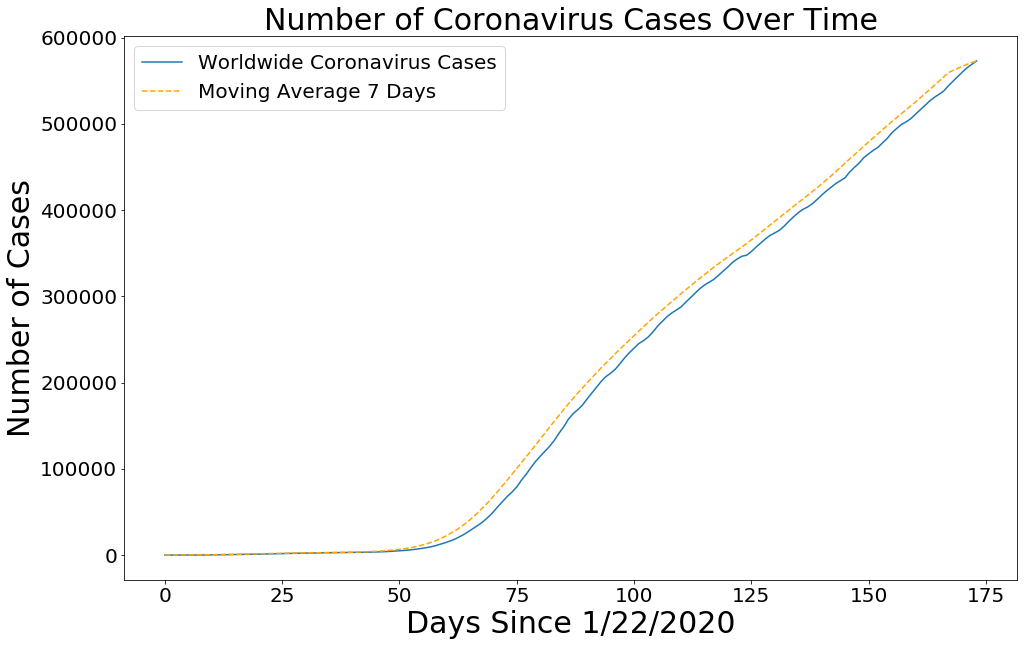

In [20]:
#plotting the graph for number of cases

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_deaths_avg, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

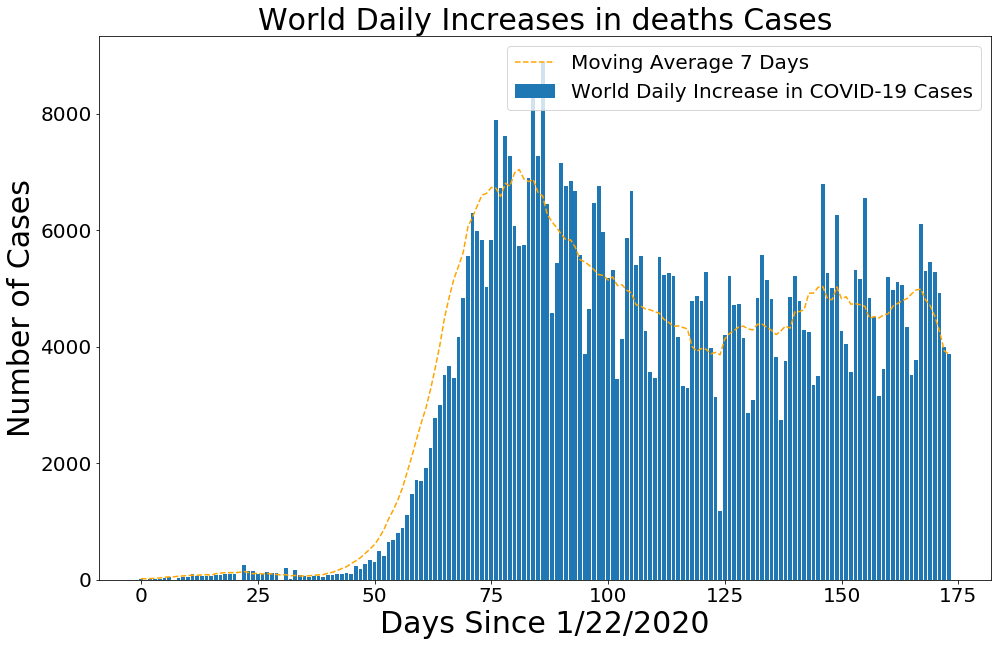

In [21]:
#plotting the graph for deaths cases

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in deaths Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()